## For a given dataset predict number of bikes getting shared based on different parameters 

### Data Preprocessing

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning from scratch/')
from ipynb.fs.full.ml_library import *

# importing dataset & storing it as pandas dataframe
bike_data = pd.read_csv('bike_sharing.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Checking for null values

In [2]:
bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [3]:
bike_data.describe()         # observing statistical summary of columns

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
# removing unncessary columns
bike_data.drop(['dteday', 'instant', 'casual', 'registered'], axis=1, inplace=True)

#### Checking correlations between different (continuous numerical) columns of data

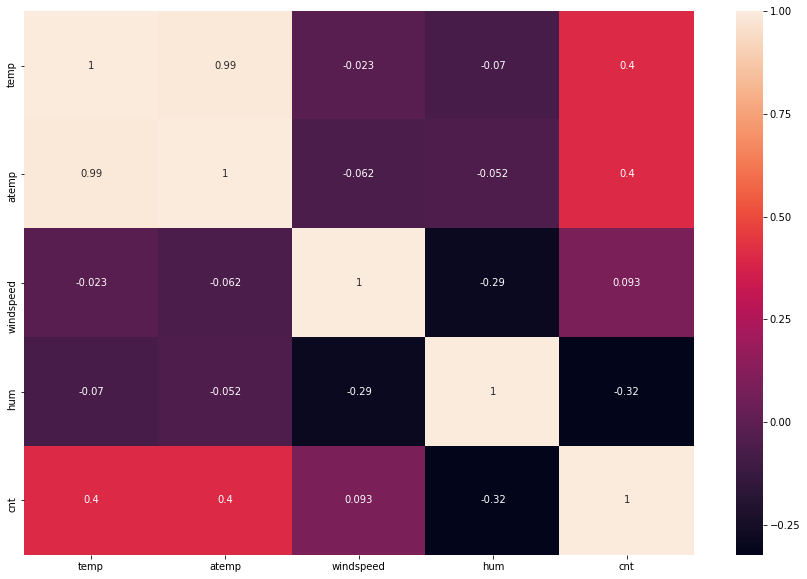

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(data=bike_data.loc[:,['temp', 'atemp','windspeed','hum','cnt']].corr(), annot=True)
plt.show()

In [6]:
# removing one of in pairs of well correlated feature columns
bike_data.drop(['atemp'],axis=1, inplace=True)

In [7]:
# removing unnecessary categorical columns
#bike_data.drop(['workingday'],axis=1, inplace=True)

In [8]:
categorical_cols = ['hr','mnth','weekday', 'holiday','yr','season','weathersit']
for col in categorical_cols:
    print(bike_data.groupby(col).mean())

      season        yr      mnth   holiday   weekday  workingday  weathersit  \
hr                                                                             
0   2.500000  0.502755  6.534435  0.028926  3.004132    0.683196    1.398072   
1   2.497238  0.502762  6.526243  0.029006  3.008287    0.682320    1.400552   
2   2.511888  0.507692  6.567832  0.029371  3.027972    0.681119    1.409790   
3   2.539455  0.509326  6.645624  0.025825  3.027260    0.674319    1.424677   
4   2.552367  0.516499  6.664275  0.028694  3.011478    0.674319    1.426112   
5   2.513250  0.507671  6.581590  0.029289  3.023710    0.690377    1.422594   
6   2.497931  0.502069  6.531034  0.028966  3.009655    0.684138    1.451034   
7   2.496561  0.500688  6.525447  0.028886  3.001376    0.682256    1.486933   
8   2.496561  0.500688  6.525447  0.028886  3.001376    0.682256    1.474553   
9   2.496561  0.500688  6.525447  0.028886  3.001376    0.682256    1.484182   
10  2.496561  0.500688  6.525447  0.0288

In [9]:
bike_data.drop(['holiday'], axis=1,inplace=True)

#### Checking for outliers in continuous numerical columns

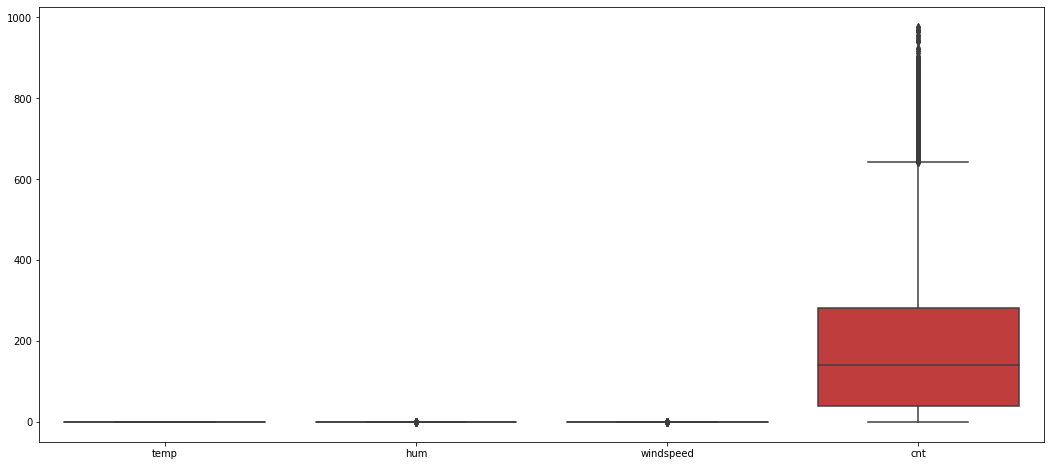

In [10]:
plt.figure(figsize=(18,8))
sns.boxplot(data=bike_data.loc[:,['temp','hum','windspeed','cnt']])
plt.show()

In [11]:
bike_data = remove_outliers(bike_data, ['cnt'])
bike_data.shape                  # shape after removing outliers

(16874, 11)

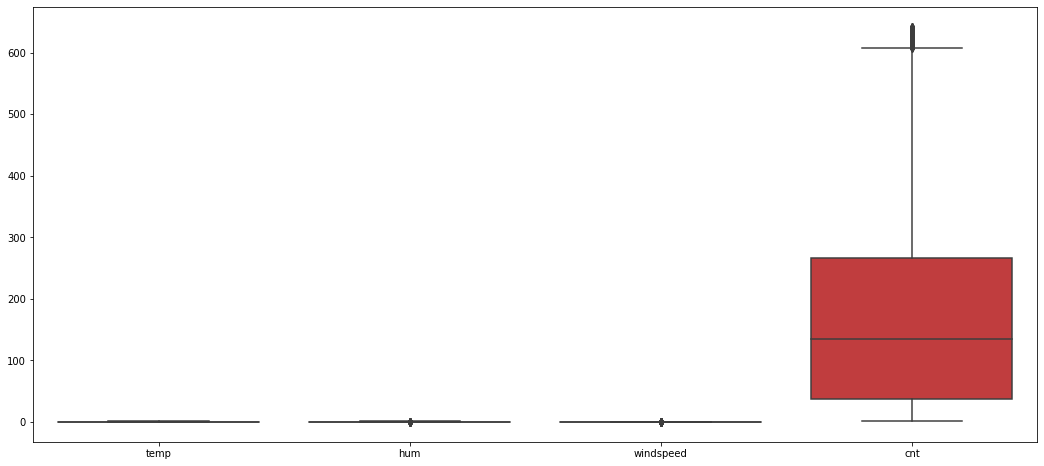

In [12]:
plt.figure(figsize=(18,8))
sns.boxplot(data=bike_data.loc[:,['temp','hum','windspeed','cnt']])
plt.show()

In [13]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Separating out feature & label columns

In [14]:
# taking continuous numerical variable columns  or two category categorical columns
feature_cols = [col for col in bike_data.columns if col != 'cnt']
x_values = bike_data.loc[:,feature_cols].values
y_values = bike_data['cnt'].values

In [15]:
x_values.shape

(16874, 10)

#### Creating polynomial features

In [16]:
poly = PolynomialFeatures(degree=5)
x_values = poly.fit_transform(x_values)

In [17]:
x_values.shape

(16874, 3003)

#### Splitting dataset into train set & test set

In [18]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size = 0.8, random_state=10) 

### Buliding linear regression model

In [19]:
regressor = LinearRegression()       # creating object from LinearRegression class
regressor.fit(train_x_values, train_y_values)       # building linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Storing predictions for train set

In [20]:
train_prediction = regressor.predict(train_x_values)
test_prediction = regressor.predict(test_x_values)

### Calculating errors

In [21]:
mean_abs_error = metrics.mean_absolute_error(test_y_values, test_prediction)
mean_abs_error

61.98154947624825

In [22]:
mean_sqr_error = metrics.mean_squared_error(test_y_values, test_prediction)
mean_sqr_error

7672.0140399203565

In [23]:
root_mean_sqr_error = np.sqrt(mean_sqr_error)
root_mean_sqr_error

87.59003390751916

### Evaluating model against test set

In [24]:
print(f'r2_score: {metrics.r2_score(test_y_values, test_prediction)}')

r2_score: 0.6896583547067018
